# DAY3.AD SALE PREDICTION from Existing Customer using LOGISTIC REGRESSION 

## Importing Libraries

In [ ]:
import numpy as np  # to perform array
import pandas as pd  #useful for loading the dataset

In [ ]:
file="DigitalAd_dataset.csv"
dataset=pd.read_csv(file)
print(dataset)

     Age  Salary  Status
0     18   82000       0
1     29   80000       0
2     47   25000       1
3     45   26000       1
4     46   28000       1
..   ...     ...     ...
395   35   65000       0
396   26   80000       0
397   26   52000       0
398   20   86000       0
399   32   18000       0

[400 rows x 3 columns]


##Summarize Dataset

In [ ]:
print(dataset.shape)
print(dataset.head(5))

(400, 3)
   Age  Salary  Status
0   18   82000       0
1   29   80000       0
2   47   25000       1
3   45   26000       1
4   46   28000       1


##Segregate Dataset into X(Input/Independent Variable) & Y(Output/Dependent Variable)

In [ ]:
X=dataset.iloc[:,:-1].values
X

array([[    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],
       [    27,  17000],
       [    33,  51000],
       [    35, 108000],
       [    30,  15000],
       [    28,  84000],
       [    23,  20000],
       [    25,  79000],
       [    27,  54000],
       [    30, 135000],
       [    31,  89000],
       [    24,  32000],
       [    18,  44000],
       [    29,  83000],
       [    35,  23000],


In [ ]:
Y=dataset.iloc[:,-1].values
Y

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,

##Splitting dataset into Train & Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

##**Feature Selection**
### We scale our data to make all features contribute equally to the result
###**Fit_Transform** - fit transform is calculating the mean and variance of each of the features present in our data
### **Transform** - Transform method is transforming all the features using the respective mean and variance ,
### We want our test data to be a completely new and a surprise set for our model


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 0.97446763  0.56400811]
 [-1.52088611 -1.28151705]
 [ 0.30264162  0.03671521]
 [-0.36918439 -0.81281224]
 [ 0.49459191  1.20847722]
 [-0.1772341   0.82765456]
 [-0.27320924 -0.78351819]
 [ 0.39861676  0.24177356]
 [-0.27320924  0.00742116]
 [ 0.01471619 -0.60775389]
 [ 0.11069133  0.00742116]
 [-0.46515953  2.29235707]
 [ 0.39861676 -0.02187289]
 [-0.27320924 -1.28151705]
 [ 1.93421906 -1.39869325]
 [-0.27320924  2.23376897]
 [ 0.11069133  1.03271291]
 [-0.56113467  1.44282962]
 [ 0.97446763  1.85294632]
 [ 0.30264162  0.03671521]
 [-1.13698554 -1.04716465]
 [-0.08125895  0.27106761]
 [ 0.30264162 -0.54916579]
 [-0.27320924 -0.60775389]
 [ 0.87849248 -1.39869325]
 [ 0.78251734 -0.34410744]
 [-0.46515953 -1.252223  ]
 [ 0.20666648  0.12459736]
 [ 0.39861676  0.97412481]
 [-0.56113467  1.35494747]
 [-0.46515953 -0.05116694]
 [-0.56113467  2.32165112]
 [-0.75308496  0.27106761]
 [ 1.16641791 -0.78351819]
 [ 0.20666648  1.06200696]
 [ 0.20666648 -0.40269554]
 [ 0.30264162 -0.31481339]
 

##Training


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

##Predicting , whether new customer with age & salary will Buy or Not 

In [ ]:
age=int(input("Enter New Customer's Age : "))
sal=int(input("Enter New Customer's Salary : "))
newCust = [[age,sal]]
result=model.predict(sc.transform(newCust))
print(result)
if result==1 :
  print("Customer will buy")
else :
  print("Customer won't buy")  

Enter New Customer's Age : 29
Enter New Customer's Salary : 80000
[0]
Customer won't buy


###Prediction for all Test Data

In [ ]:
y_pred = model.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.rehape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix : ")
print(cm)

Confusion Matrix : 
[[61  0]
 [20 19]]


In [ ]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print("Accuracy: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy: 80.0%


No Skill: ROC AUC=50.000
Logistic Skill: ROC AUC=92.980


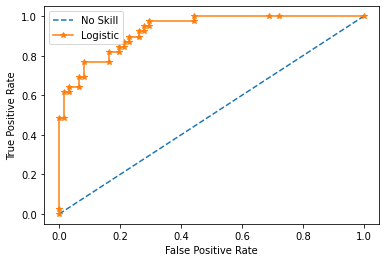

In [ ]:
# Receiver Operating Curve - ROC Curve

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

nsProbability = [0 for _ in range(len(y_test))]
lsProbability = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lsProbability = lsProbability[:, 1]
# calculate scores
nsAUC = roc_auc_score(y_test, nsProbability)
lrAUC = roc_auc_score(y_test, lsProbability)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (nsAUC*100))
print('Logistic Skill: ROC AUC=%.3f' % (lrAUC*100))
# calculate roc curves
nsFP, nsTP, _ = roc_curve(y_test, nsProbability)
lrFP, lrTP, _ = roc_curve(y_test, lsProbability)
# plot the roc curve for the model
plt.plot(nsFP, nsTP, linestyle='--', label='No Skill')
plt.plot(lrFP, lrTP, marker='*', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()